# Noise - Juniper Ferlan #
Naturally, the most boring neighborhood in the city would be one where the residents and even visitors are quiet at all times. Whether they are always asleep or the neighborhood is just mostly deserted, a neighborhood that's quiet is a neighborhood that's bland. When nothing is going on, residents can feel secure knowing they're not missing out on anything important at all!

### So, how do we measure quietness? ###
With noise complaints! Since the non-emergency police phone line 311 takes all noise complaints, I found the [311 Data](https://data.wprdc.org/dataset/311-data) dataset.

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Read .csv of all up-to-date 311 calls
data = pd.read_csv("https://data.wprdc.org/datastore/dump/29462525-62a6-45bf-9b5e-ad2e1c06348d")

data.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12T10:50:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20T07:52:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24T07:44:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19T12:24:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06T23:04:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES


As you can see, there are a LOT of different requests for which the non-emergency line is called and the calls do not always need to be made from a particular neighborhood. Let's only show the relevant ones, where noise complaints are made for a specific neighborhood.

In [2]:
# Create and use mask to only show 311 calls where "Noise" is mentioned
mask = data['request_type_name'].str.contains('Noise')
noise = data[mask]

# Drop all irrelevant columns and all rows where no neighborhood is logged
noise = noise[['request_type_name', 'neighborhood']]
noise.dropna(inplace = True, ignore_index = True)

noise.head()

,request_type_name,neighborhood
0,Excessive Noise/Disturbances,Central Business District
1,Excessive Noise/Disturbances,Highland Park
2,Noise,Central Northside
3,Excessive Noise/Disturbances,Highland Park
4,Excessive Noise/Disturbances,Bon Air


Much better! Now let's see how many noise complaints were made by each neighborhood and find the one(s) with the smallest amount.

In [3]:
noise2 = noise.groupby(['neighborhood']).size()
print(noise2.sort_values().head(10))

neighborhood
Glen Hazel           1
Hays                 1
Northview Heights    1
Ridgemont            1
Homewood West        2
New Homestead        2
Chartiers City       3
Arlington Heights    4
Bedford Dwellings    5
South Shore          5
dtype: int64


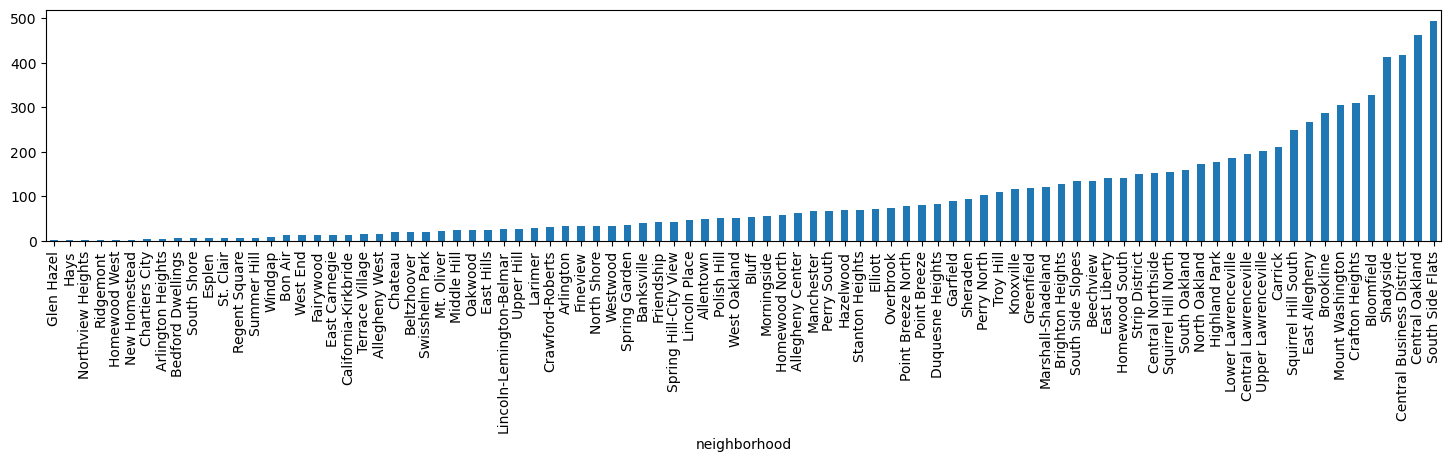

In [4]:
noise2.sort_values().plot(x='neighborhood', kind='bar', figsize=(18,3))
plt.show()

And there we go! As we can see, there's a handful of neighborhoods with noise complaint counts as low as one, those being Glen Hazel, Hays, Northview Heights, and Ridgemont. Since this dataset was gathered over the course of several years, that means that living in any of those neighborhoods means you are very unlikely to deal with unwanted noise. Think of how great you'll look after all the beauty sleep you'll get!